# Модуль 2. Разведочный анализ данных
Мы продолжаем работать с данными, подготовленными в предыдущем Модуле. Предобработанные данные предстоит классифицировать и визуализировать зависимости данных.
## 2.1 Разбиение набора данных

In [1]:
# загрузка предобработанных данных
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_all = pd.read_csv('data/all_regions.csv')
data_all.head(5)

,light,nearby_Иное образовательное учреждение,nearby_Нерегулируемый перекрёсток неравнозначных улиц (дорог),"nearby_Регулируемый пешеходный переход, расположенный на участке улицы или дороги, проходящей вдоль территории школы или иного детского учреждения",nearby_Стихийно возникшая (не предусмотренная) ледовая переправа,nearby_Мост,nearby_Крупный торговый объект (являющийся объектом массового тяготения пешеходов и (или) транспорта),"nearby_Подход к мосту, эстакаде, путепроводу",nearby_Территориальное подразделение МВД России (либо его структурное подразделение),nearby_Школа либо иная детская (в т.ч. дошкольная) организация,...,"road_Неправильное применение, плохая видимость дорожных знаков",road_Ограничение видимости,"road_Сужение проезжей части, наличие препятствий, затрудняющих движение транспортных средств",cluster_LatLng,hour,day,month,day_of_week,year,danger_class
0,10,0,0,0,0,0,0,0,0,0,...,0,0,0,8,23,12,10,0,2015,2
1,6,0,0,0,0,0,0,0,0,0,...,0,0,0,8,0,18,10,6,2015,2
2,6,0,1,0,0,0,0,0,0,0,...,0,0,0,8,21,3,10,5,2015,2
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,8,15,25,10,6,2015,1
4,10,0,1,0,0,0,0,0,0,0,...,0,0,0,8,20,23,10,4,2015,2


Итак, нужно по выделенным в прошлом модуле признакам предсказывать класс опасности дорожного участка (атрибут `danger_class`). То есть предикторами (признаками, по которым мы будем предсказывать целевую переменную) будут все атрибуты, за исключением столбца `danger_class`.

In [2]:
X = data_all.drop(columns=['danger_class'])
y = data_all['danger_class']

Рассмотрим распределение значений целевой переменной.

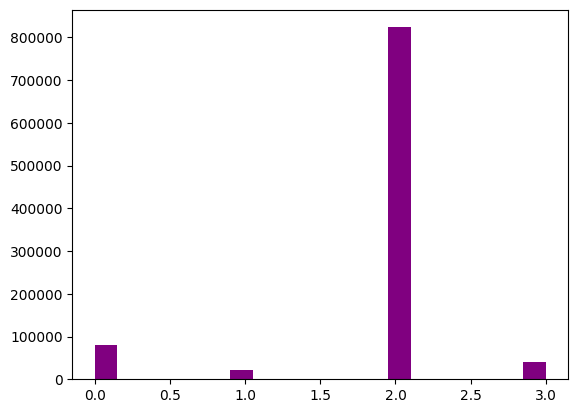

In [3]:
y.hist(bins=20, color='purple')
plt.grid(False);

Итак, в данных наблюдается явный дисбаланс. 

Необходимо использовать стратифицированное разбиение данных, чтобы соотношение классов было одинаковым как в обучающей, так и в валидационной выборке.

In [4]:
# посмотрим размер данных
data_all.shape

(964575, 118)

Данных достаточно много, чтобы для теста отложить выборку покрупнее. Принимается решение разделить данные в соотношении 7:3.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=2023, stratify=y)

In [6]:
y_train.value_counts(normalize=True)

2    0.853561
0    0.084236
3    0.040798
1    0.021405
Name: danger_class, dtype: float64

In [7]:
y_test.value_counts(normalize=True)

2    0.853559
0    0.084237
3    0.040799
1    0.021405
Name: danger_class, dtype: float64

## 2.2 Визуализация зависимостей данных
Покажем зависимости внутри данных, попробуем найти на основе этих визуализаций наиболее значимые атрибуты. Начнём с проверки данных на мультиколлинеарность, то есть явление, когда атрибуты-предикторы сильно скоррелированы между собой.

In [8]:
corr_matrix = data_all.corr()

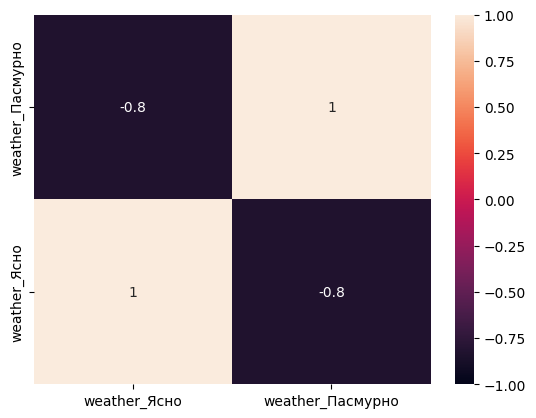

In [9]:
cols, idxs = list(), list()
for col in data_all.columns:
    for idx in corr_matrix.index:
        if abs(corr_matrix[col].loc[idx]) > 0.7 and abs(corr_matrix[col].loc[idx]) < 1:
            cols.append(col)
            idxs.append(idx)
            
sns.heatmap(corr_matrix[cols].loc[idxs], annot=True, fmt='.1g', vmin=-1, vmax=1);

Имеется обратная корреляция между признаками weather_Ясно и weather_Пасмурно. Удалим первый признак.

In [10]:
data_all.drop(columns=['weather_Ясно'], inplace=True)

Также проверим, наблюдаются ли в данных линейные зависимости предикторов и целевой переменной.

In [11]:
corr_matrix[(corr_matrix['danger_class'] > 0.7) & (corr_matrix['danger_class'] < 1)]

,light,nearby_Иное образовательное учреждение,nearby_Нерегулируемый перекрёсток неравнозначных улиц (дорог),"nearby_Регулируемый пешеходный переход, расположенный на участке улицы или дороги, проходящей вдоль территории школы или иного детского учреждения",nearby_Стихийно возникшая (не предусмотренная) ледовая переправа,nearby_Мост,nearby_Крупный торговый объект (являющийся объектом массового тяготения пешеходов и (или) транспорта),"nearby_Подход к мосту, эстакаде, путепроводу",nearby_Территориальное подразделение МВД России (либо его структурное подразделение),nearby_Школа либо иная детская (в т.ч. дошкольная) организация,...,"road_Неправильное применение, плохая видимость дорожных знаков",road_Ограничение видимости,"road_Сужение проезжей части, наличие препятствий, затрудняющих движение транспортных средств",cluster_LatLng,hour,day,month,day_of_week,year,danger_class


Как видим, линейных зависимостей между признаками и целевой переменной нет. Это значит, что модель, которую мы строим для определения уровня опасности дорожно-транспортного участка должна быть нелинейной $-$ здесь отлично справятся древовидные модели и нейронные сети.

Попробуем найти наиболее значимые признаки с помощью показателя взаимной информации.

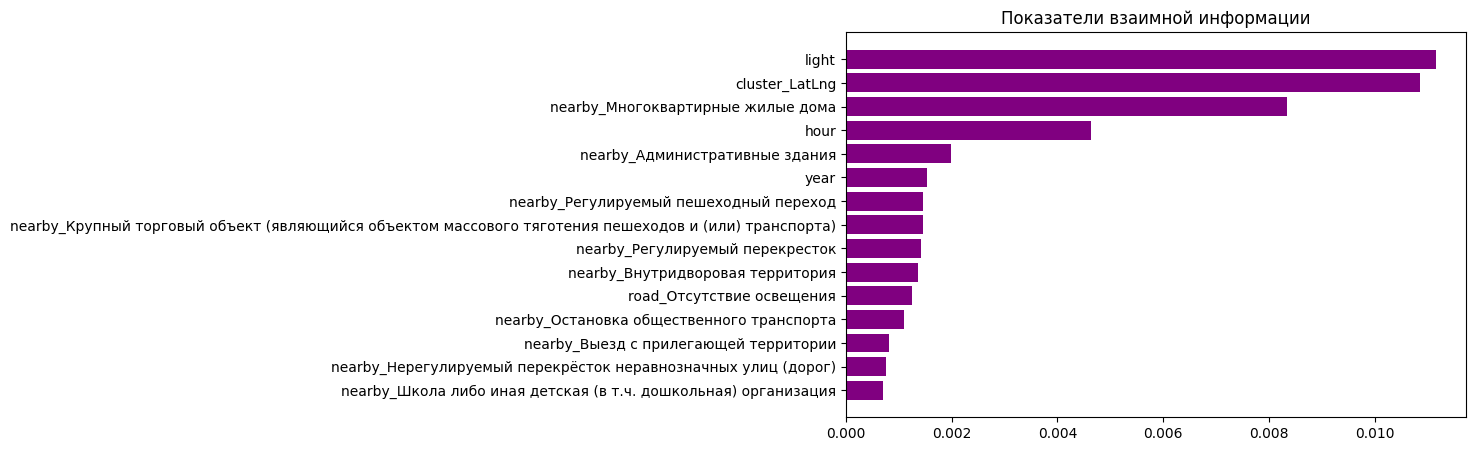

In [12]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores, color='purple')
    plt.yticks(width, ticks)
    plt.title("Показатели взаимной информации")

X_int = X.select_dtypes(include=['int'])
discrete_features = X_int.dtypes == 'int'
mi_scores = make_mi_scores(X_int, y, discrete_features)

plt.figure(dpi=100, figsize=(8, 5))
# отобразим только 15 наиболее значимых признаков
plot_mi_scores(mi_scores[:15])

На графике видно, что наиболее важными признаками для классификации являются `light`, `cluster_LatLng`, `nearby_Многоквартирные жилые дома` и `hour`, затем очень много признаков, описывающих местность, и один признак, сообщающий об отсутствии освещения. Полученные данные вполне интерпретируемы: на степень опасности участка дороги влияет освещённость $-$ чем темнее, тем выше вероятность возникновения происшествия. Также на вероятность возникновения аварии влияет местность и окружающая инфраструктура. Например, большая часть ДТП происходит рядом с жилыми домами, а также в нерегулируемых участках.

## 2.3 Классификация исходных компетенций
Определимся с нашей задачей. У нас есть 4 класса уровня опасности дорожных участков, то есть у нас задача <b>многоклассовой классификации</b>. При этом в данных наблюдается дисбаланс классов. Для описанных условий "из коробки" может подойти модель дерева принятия решений\.

Поскольку наблюдается дисбаланс, оценивать качество модели с помощю метрики accuracy не представляется возможным, наиболее оптимальной будет в данном случае метрика precision, адаптированная для несбалансированных данных. Возьмём точность с весами, равными вероятностям класса. Выбор метрики обуславливается необходимостью чёткого отличения одного класса от всех других.

Также будем замерять взвешенную полноту и взвешенное усреднение полноты и точности - f-меру.

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# соберём все метрики в одну функцию
def quality_report(prediction, actual):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(prediction, actual),
        precision_score(prediction, actual, average='weighted'),
        recall_score(prediction, actual, average='weighted', zero_division=1),
        f1_score(prediction, actual, average='weighted')
    ))
    
    cnf_matrix = confusion_matrix(actual, prediction)
    plt.figure(figsize=(12, 10))
    
    # обычная матрица неточностей
    plt.subplot(2, 2, 1, 
                title='Матрица неточностей',
                ylabel='Истинные метки',
                xlabel='Прогнозы')
    sns.heatmap(cnf_matrix, annot=True)
    
    # нормализованная матрица неточностей
    cnf_matrix = cnf_matrix / cnf_matrix.sum(axis=1, keepdims=True)
    plt.subplot(2, 2, 2, 
                title='Матрица неточностей нормализованная',
                ylabel='Истинные метки',
                xlabel='Прогнозы')
    sns.heatmap(cnf_matrix, fmt='.1g', cmap=plt.cm.gray)

    plt.show();

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# попробуем сразу подобрать оптимальные параметры, чтобы избежать переобучения
tree_params = {
    'max_depth': list(range(20, 45)),
    'min_samples_leaf': [51, 55, 61, 65, 71, 75, 81]
}

locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=2023, class_weight='balanced'), 
                                 tree_params, verbose=True, n_jobs=-1, cv=3, scoring='precision_weighted')
locally_best_tree.fit(X_train, y_train)
locally_best_tree.best_params_, round(locally_best_tree.best_score_, 3)

Fitting 3 folds for each of 175 candidates, totalling 525 fits


({'max_depth': 21, 'min_samples_leaf': 81}, 0.804)

На трейне
Accuracy: 0.367
Precision: 0.481
Recall: 0.367
f1_score: 0.274


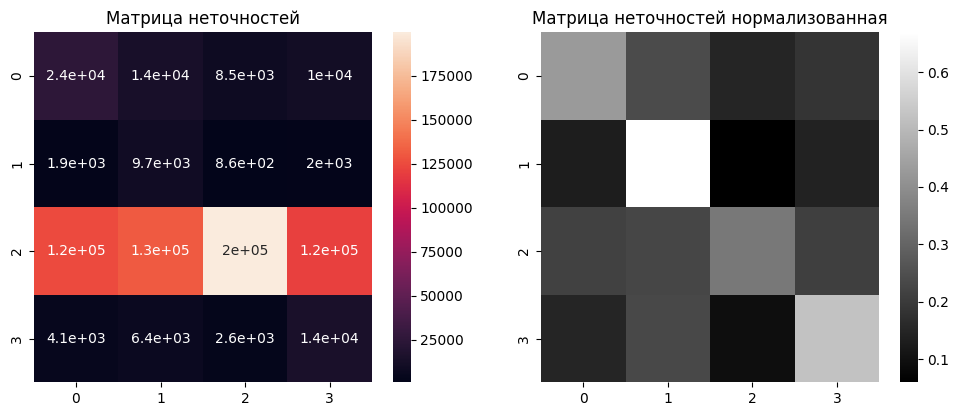

На тесте
Accuracy: 0.344
Precision: 0.375
Recall: 0.344
f1_score: 0.242


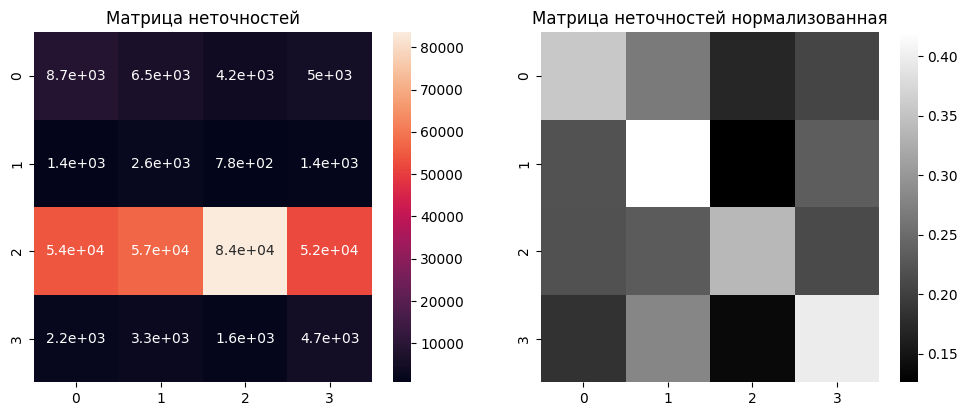

In [15]:
print('На трейне')
quality_report(locally_best_tree.best_estimator_.predict(X_train), y_train)
print('На тесте')
quality_report(locally_best_tree.predict(X_test), y_test)

Модель дерева принятия решений показала неудовлетворительные результаты: точность модели составила всего 37.5%, что является довольно низким показателем. Тем не менее, модель получилась достаточно регуляризированной, удалось избежать переобучения.

Стоит обратить внимание, что лучше всего модель распознаёт классы 0 и 2, поскольку объектов этих классов в данных представлено в большем количестве.

Попробуем более сильную модель, основанную на деревьях, $-$ модель градиентного бустинга.

In [16]:
%%time
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(
    n_estimators=200, max_depth=14,learning_rate=0.1,
    objective="multi:softprob", num_class=4, eval_metric='map',  
    verbosity=2, random_state=2023, n_jobs=-1
)

xgb_clf.fit(X_train, y_train)

CPU times: user 8min 40s, sys: 870 ms, total: 8min 41s
Wall time: 33.3 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='map', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1, num_class=4,
              num_parallel_tree=None, ...)

На трейне
Accuracy: 0.881
Precision: 0.978
Recall: 0.881
f1_score: 0.918


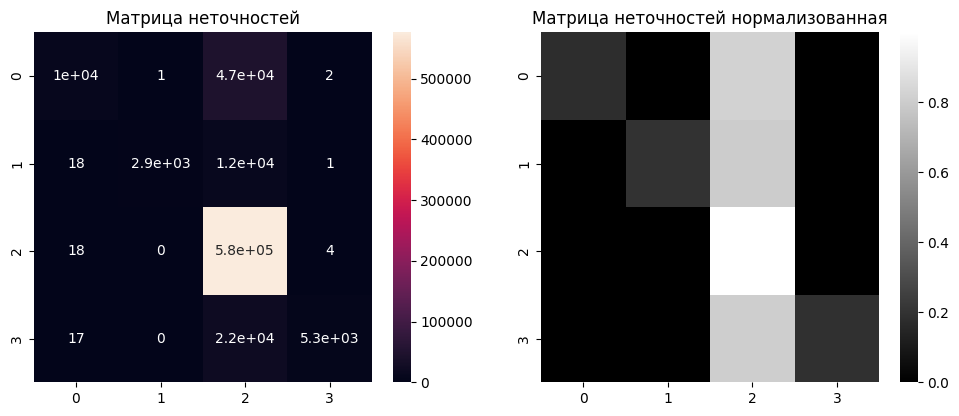

На тесте
Accuracy: 0.853
Precision: 0.995
Recall: 0.853
f1_score: 0.918


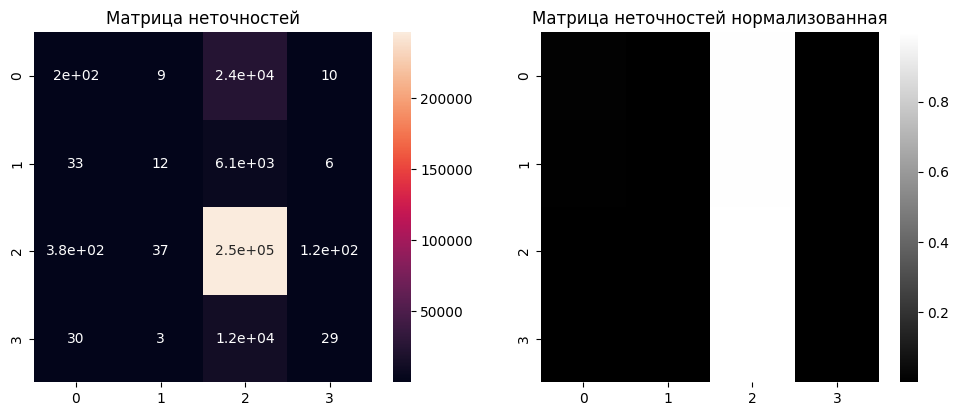

In [17]:
print('На трейне')
quality_report(xgb_clf.predict(X_train), y_train)
print('На тесте')
quality_report(xgb_clf.predict(X_test), y_test)

Модель градиентного бустинга на деревьях показала себя гораздо лучше, показатель целевой метрики $-$ 99.5%, что является отличным результатом! При этом модель показывает хорошие результаты и по показателю полноты.

Стоит обратить внимание, что, несмотря на высокие показатели, модель продолжает достаточно сильно ошибаться. Если посмотреть на нормализованную матрицу неточностей, то можно увидеть, что модель продолжает путать каждый класс с классом 2.

Опробуем другой принцип ансамблирования деревьев $-$ бэггинг. В качестве примера возьмём случайный лес деревьев.

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300, max_depth=13, 
                                class_weight='balanced', n_jobs=-1)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=13, n_estimators=300,
                       n_jobs=-1)

На трейне
Accuracy: 0.523
Precision: 0.504
Recall: 0.523
f1_score: 0.428


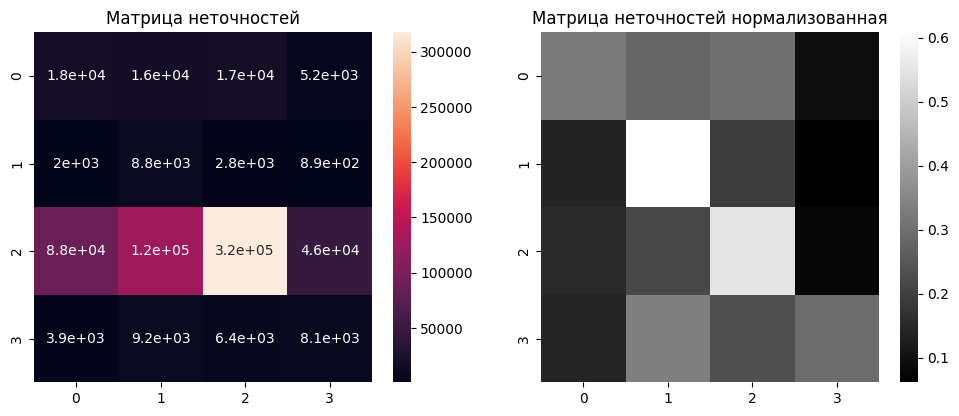

На тесте
Accuracy: 0.512
Precision: 0.464
Recall: 0.512
f1_score: 0.414


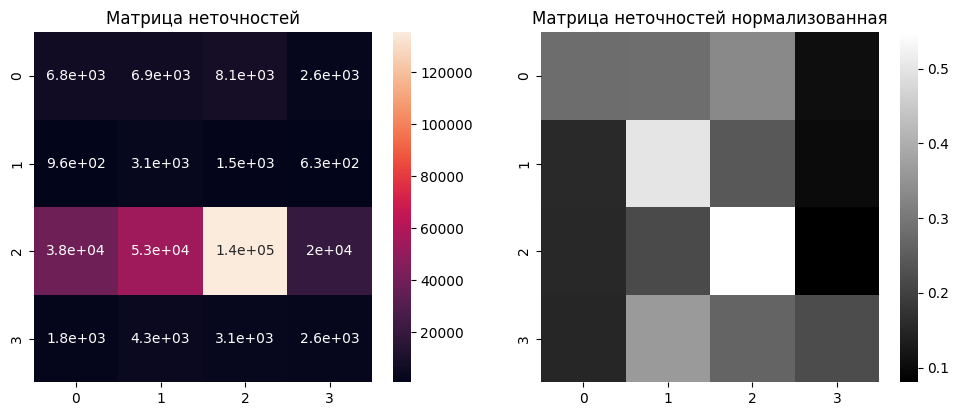

In [19]:
print('На трейне')
quality_report(rf_clf.predict(X_train), y_train)
print('На тесте')
quality_report(rf_clf.predict(X_test), y_test)

Случайный лес оказался не лучше градиентного бустинга на деревьях, но такой же устойчивый, то есть нет переобучения, но наблюдается недообучение.

На данный момент наилучшие результаты продемонстрировал градиентный бустинг, поэтому принимается решение выбрать эту модель как наилучшую из опробованных и использовать в дальнейшем.

## 2.4 Feature Engeneering
Попробуем преобразовать наши данные, чтобы повысить качество модели градиентного бустинга.
Для этого воспользуемся алгоритмом понижения размерности $-$ анализом главных компонент.

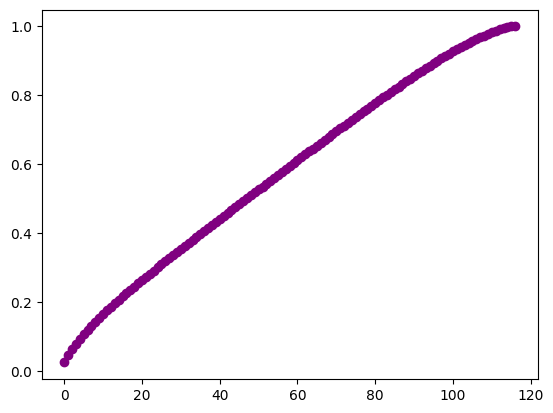

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

pca = PCA()
pca.fit(X_train_scaled) # передаются стандартизированные данные

# построим график, на котором отражено нарастание доли объяснённой дисперсии
# в зависимости от увеличения выбора количества компонент
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'o--', color='purple');

Можно заметить, что примерно 115 из 119 компонент объясняют свыше 98% дисперсии, поэтому можно попробовать взять только 115 компонент и обучить градиентный бустинг на трансформированных данных.

In [21]:
X_train_new = PCA(n_components=115).fit_transform(X_train_scaled)
X_test_new = PCA(n_components=115).fit_transform(X_test_scaled)

In [22]:
xgb_clf = XGBClassifier(
    n_estimators=200, max_depth=6,learning_rate=0.1,
    objective="multi:softprob", num_class=4, eval_metric='map',  
    verbosity=2, random_state=2023, n_jobs=-1
)

xgb_clf.fit(X_train_new, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='map', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1, num_class=4,
              num_parallel_tree=None, ...)

На трейне
Accuracy: 0.854
Precision: 1.000
Recall: 0.854
f1_score: 0.921


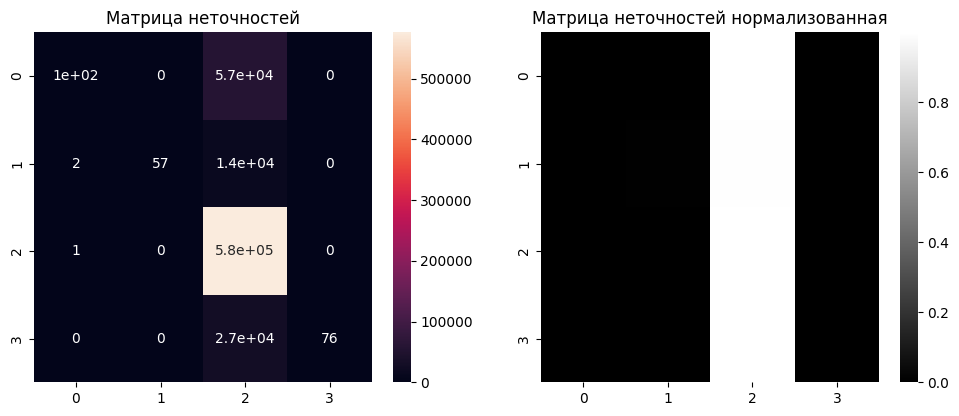

На тесте
Accuracy: 0.854
Precision: 1.000
Recall: 0.854
f1_score: 0.921


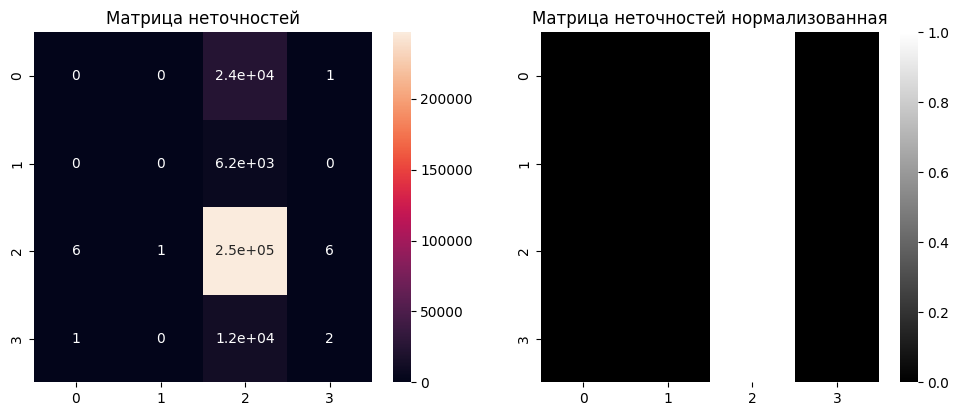

In [23]:
print('На трейне')
quality_report(xgb_clf.predict(X_train_new), y_train)
print('На тесте')
quality_report(xgb_clf.predict(X_test_new), y_test)

По ранее определённым показателям видим, что трансформация данных повысила целевую метрику. Однако модель не смогла распознать классы с наименьшей долей внутри набора данных, что гораздо хуже первоначальной модели. Принимается решение не использовать трансформацию данных.

## Итог
В процессе выполнения заданий второго модуля был поставлен эксперимент по построению наилучшей модели машинного обучения для задачи классификации дорожных участков по степени опасности. Было определено, что перед нами задача многоклассовой классификации с 4 классами. 

Также были визуализированы зависимости в данных. Как мы увидели, наибольшее влияние на степень опасности дорожного участка имеют его принадлежность к определённому региону России, степень его освещённости, время и некоторые виды инфраструктуры.

На этих данных были опробованы три модели машинного обучения, наилучшей и наиболее стабильной из котоорых оказался градиентный бустинг на деревьях. 

Также была предпринята попытка трансформации данных, однако результаты обучения модели показали, что трансформация ухудшает качество модели, поэтому было принято решение не использовать преобразование данных в итоговом варианте системы.